In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [4]:
train.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

In [5]:
test.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0


In [6]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [7]:
train.shape

(2000, 21)

In [8]:
train.duplicated().sum()

0

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

id:ID

battery_power:Total energy a battery can store in one time measured in mAh

blue:Has bluetooth or not
clock_speed:speed at which microprocessor executes instructions
dual_sim:Has dual sim support or not
fc:Front Camera mega pixels
four_g:Has 4G or not
int_memory:Internal Memory in Gigabytes
m_dep:Mobile Depth in cm
mobile_wt:Weight of mobile phone
n_cores:Number of cores of processor
pc:Primary Camera mega pixels
px_height:Pixel Resolution Height
px_width:Pixel Resolution Width
ram:Random Access Memory in Megabytes
sc_h:Screen Height of mobile in cm
sc_w:Screen Width of mobile in cm
talk_time:longest time that a single battery charge will last when you are
three_g:Has 3G or not
touch_screen:Has touch screen or not
wifi:Has wifi or not

In [10]:
# There is no missing Value
# There is no duplicate data

In [11]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
# From the above descriptive statistical analysis it is clear that there is no outlier in any feature and all are in range.
# Also the data needs to be scaled before predicting as all features values are not in same ranges.
# There is no need for encoding as there is no categorical or object type feature present

In [13]:
# Additional analysis for Outlier 

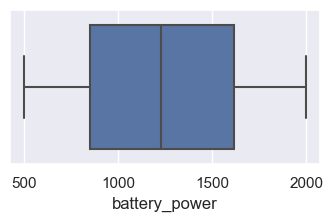

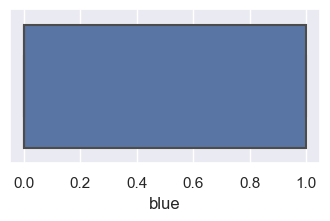

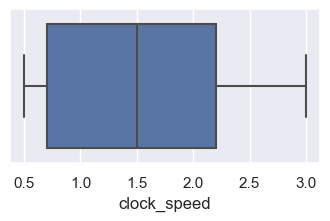

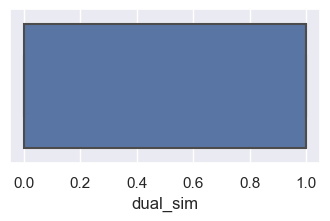

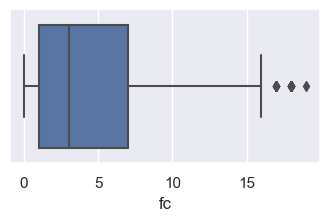

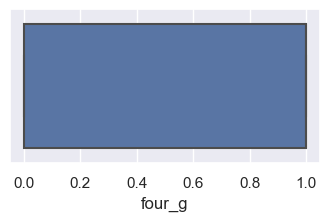

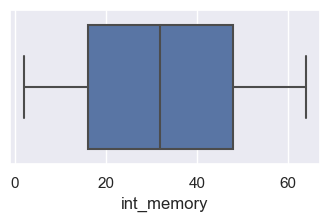

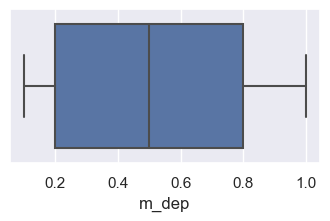

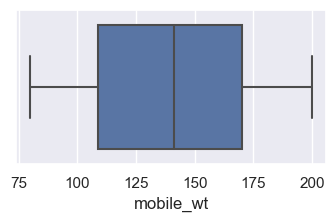

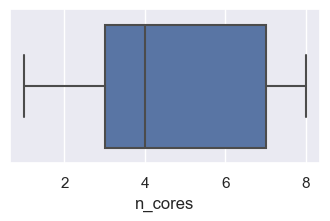

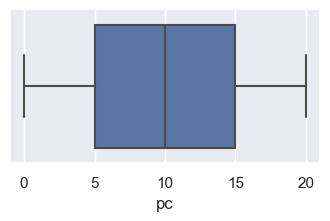

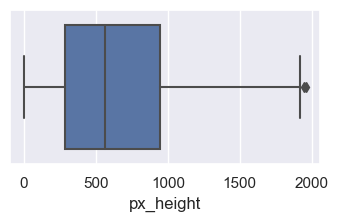

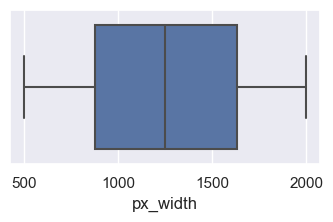

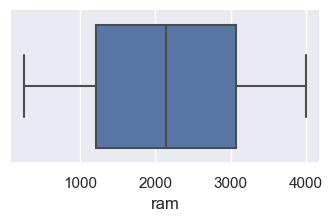

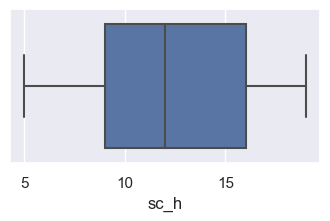

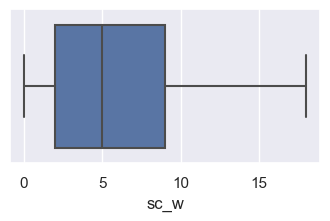

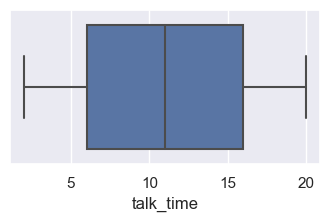

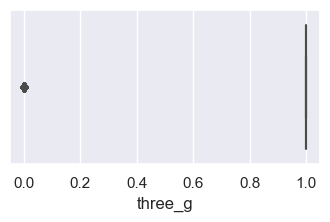

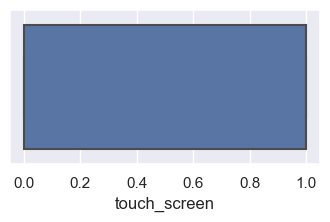

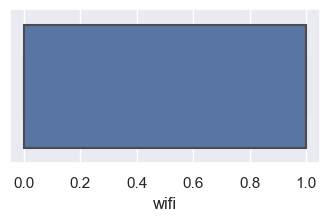

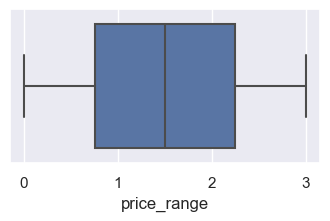

In [14]:
for i in train.columns:
    plt.figure(figsize = (4,2))
    sns.boxplot(data = train,x = i)
    plt.show()

In [15]:
cols = train.corr().nlargest(10,'price_range')['price_range'].index

In [16]:
cols

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h'],
      dtype='object')

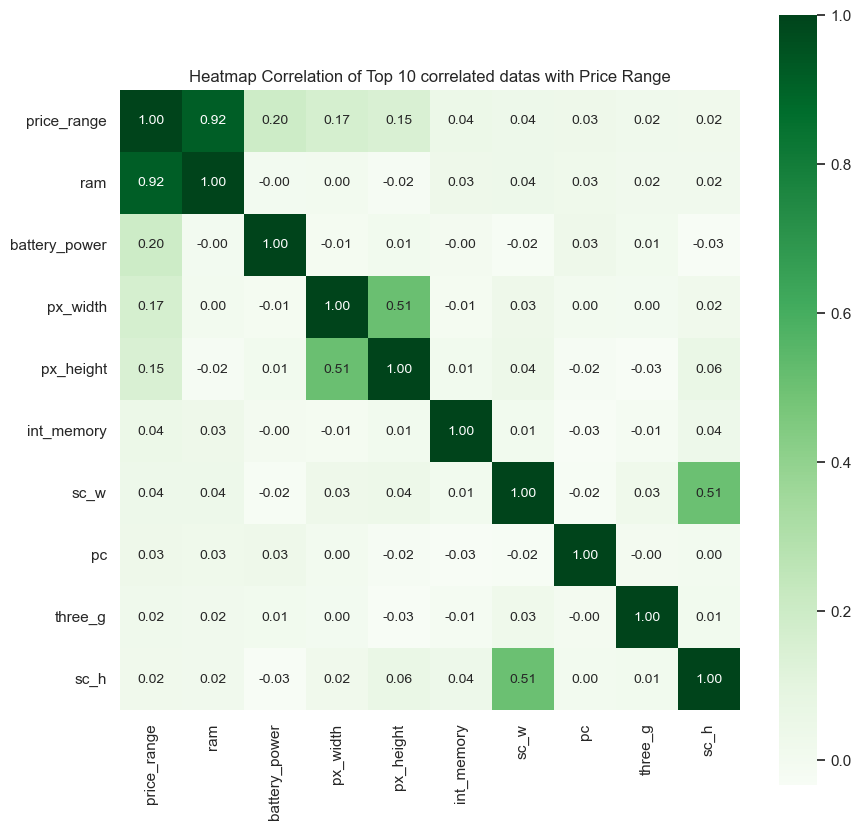

In [17]:
plt.figure(figsize=(10,10))
ax= plt.axes()
sns.heatmap(train[cols].corr(),cmap = 'Greens',cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax = ax)
ax.set_title('Heatmap Correlation of Top 10 correlated datas with Price Range')
plt.show()

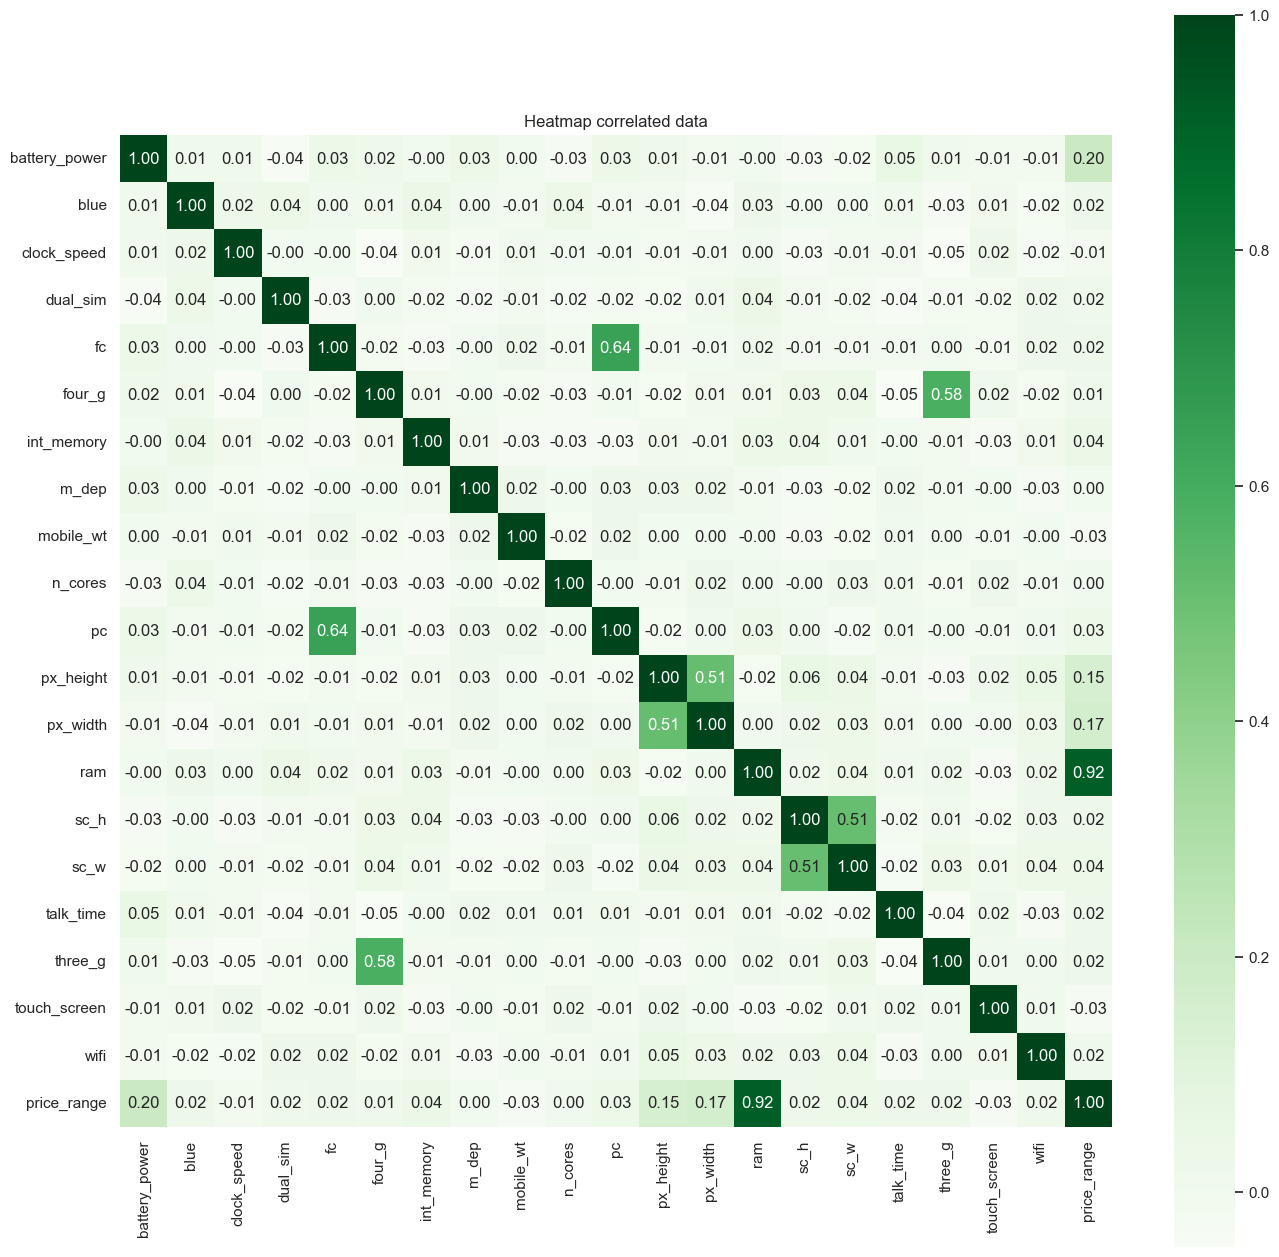

In [18]:
plt.figure(figsize=(16,16))
ax= plt.axes()
sns.heatmap(train.corr(),cmap = 'Greens',cbar=True, annot=True, square=True, fmt='.2f',ax=ax)
ax.set_title('Heatmap correlated data')
plt.show()

In [19]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [20]:
# train = train[['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
#        'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h']] # top 10 correlated features with price_range

In [21]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [63]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train)
profile.to_file(output_file = 'MobilePriceClassifier.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Scaling

In [22]:
# Since no missing values, no outliers, no duplicates. we will now process the train data to predict the model

In [23]:
x = train.drop(['price_range'],axis = 1)
y = train.price_range

In [24]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [25]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [28]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [33]:
logit = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
br = BaggingClassifier()
ada = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
xgb = XGBClassifier()
knn = KNeighborsClassifier()
svr = SVC()
lgm = LGBMClassifier()
cat = CatBoostClassifier()
model = [logit,dt,rf,br,ada,gbr,xgb,knn,svr,lgm,cat]

In [34]:
for i in model:
    print(i)
    i.fit(x_train, y_train)
    y_pred_train = i.predict(x_train)
    y_pred_test = i.predict(x_test)
    print("Confusion Matrix")
    c = confusion_matrix(y_test, y_pred_test)
    print(c)
    print('\n')
    print("classification_report")
    d = classification_report(y_test, y_pred_test)
    print(d)
    print('\n')
    print("Training Accuracy", accuracy_score(y_train, y_pred_train))
    print("****************"*5)
    print("Test Accuracy", accuracy_score(y_test, y_pred_test))
    print("__"*5)
    print('\n')
    print('\n')

LogisticRegression()
Confusion Matrix
[[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]


classification_report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



Training Accuracy 0.975625
********************************************************************************
Test Accuracy 0.975
__________




DecisionTreeClassifier()
Confusion Matrix
[[ 90  15   0   0]
 [  7  77   7   0]
 [  0  12  65  15]
 [  0   0  12 100]]


classification_report
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       105
           1       0.74      

39:	learn: 0.3490009	total: 350ms	remaining: 8.4s
40:	learn: 0.3434758	total: 356ms	remaining: 8.32s
41:	learn: 0.3398364	total: 362ms	remaining: 8.25s
42:	learn: 0.3353566	total: 367ms	remaining: 8.17s
43:	learn: 0.3294325	total: 372ms	remaining: 8.08s
44:	learn: 0.3270154	total: 377ms	remaining: 8s
45:	learn: 0.3229123	total: 382ms	remaining: 7.92s
46:	learn: 0.3193358	total: 388ms	remaining: 7.87s
47:	learn: 0.3155152	total: 393ms	remaining: 7.8s
48:	learn: 0.3118720	total: 398ms	remaining: 7.72s
49:	learn: 0.3077438	total: 404ms	remaining: 7.67s
50:	learn: 0.3028072	total: 409ms	remaining: 7.61s
51:	learn: 0.2997431	total: 414ms	remaining: 7.54s
52:	learn: 0.2973991	total: 419ms	remaining: 7.49s
53:	learn: 0.2955068	total: 424ms	remaining: 7.43s
54:	learn: 0.2913742	total: 430ms	remaining: 7.39s
55:	learn: 0.2874190	total: 435ms	remaining: 7.34s
56:	learn: 0.2834905	total: 442ms	remaining: 7.3s
57:	learn: 0.2811297	total: 447ms	remaining: 7.26s
58:	learn: 0.2774289	total: 453ms	rem

211:	learn: 0.1070477	total: 1.13s	remaining: 4.2s
212:	learn: 0.1063940	total: 1.13s	remaining: 4.19s
213:	learn: 0.1059958	total: 1.14s	remaining: 4.18s
214:	learn: 0.1054553	total: 1.15s	remaining: 4.18s
215:	learn: 0.1051992	total: 1.15s	remaining: 4.17s
216:	learn: 0.1046784	total: 1.15s	remaining: 4.16s
217:	learn: 0.1039996	total: 1.16s	remaining: 4.15s
218:	learn: 0.1035527	total: 1.16s	remaining: 4.14s
219:	learn: 0.1031356	total: 1.17s	remaining: 4.13s
220:	learn: 0.1030019	total: 1.17s	remaining: 4.12s
221:	learn: 0.1026541	total: 1.17s	remaining: 4.11s
222:	learn: 0.1023933	total: 1.18s	remaining: 4.1s
223:	learn: 0.1018374	total: 1.18s	remaining: 4.09s
224:	learn: 0.1014239	total: 1.19s	remaining: 4.08s
225:	learn: 0.1011188	total: 1.19s	remaining: 4.08s
226:	learn: 0.1008455	total: 1.19s	remaining: 4.07s
227:	learn: 0.1004879	total: 1.2s	remaining: 4.06s
228:	learn: 0.0999266	total: 1.2s	remaining: 4.05s
229:	learn: 0.0994774	total: 1.21s	remaining: 4.04s
230:	learn: 0.09

399:	learn: 0.0570229	total: 1.92s	remaining: 2.88s
400:	learn: 0.0568546	total: 1.93s	remaining: 2.88s
401:	learn: 0.0566300	total: 1.93s	remaining: 2.87s
402:	learn: 0.0565110	total: 1.94s	remaining: 2.87s
403:	learn: 0.0563904	total: 1.94s	remaining: 2.86s
404:	learn: 0.0563032	total: 1.95s	remaining: 2.86s
405:	learn: 0.0562330	total: 1.95s	remaining: 2.85s
406:	learn: 0.0560615	total: 1.95s	remaining: 2.85s
407:	learn: 0.0559381	total: 1.96s	remaining: 2.84s
408:	learn: 0.0555232	total: 1.96s	remaining: 2.84s
409:	learn: 0.0552280	total: 1.97s	remaining: 2.83s
410:	learn: 0.0549962	total: 1.97s	remaining: 2.83s
411:	learn: 0.0548561	total: 1.98s	remaining: 2.82s
412:	learn: 0.0546061	total: 1.98s	remaining: 2.81s
413:	learn: 0.0544359	total: 1.98s	remaining: 2.81s
414:	learn: 0.0543030	total: 1.99s	remaining: 2.8s
415:	learn: 0.0541655	total: 1.99s	remaining: 2.8s
416:	learn: 0.0540506	total: 2s	remaining: 2.79s
417:	learn: 0.0539387	total: 2s	remaining: 2.79s
418:	learn: 0.053840

585:	learn: 0.0357181	total: 2.71s	remaining: 1.91s
586:	learn: 0.0356124	total: 2.71s	remaining: 1.91s
587:	learn: 0.0355029	total: 2.72s	remaining: 1.9s
588:	learn: 0.0354471	total: 2.72s	remaining: 1.9s
589:	learn: 0.0353355	total: 2.73s	remaining: 1.9s
590:	learn: 0.0352252	total: 2.73s	remaining: 1.89s
591:	learn: 0.0351912	total: 2.74s	remaining: 1.89s
592:	learn: 0.0351064	total: 2.74s	remaining: 1.88s
593:	learn: 0.0350467	total: 2.74s	remaining: 1.88s
594:	learn: 0.0349685	total: 2.75s	remaining: 1.87s
595:	learn: 0.0349229	total: 2.75s	remaining: 1.87s
596:	learn: 0.0348574	total: 2.76s	remaining: 1.86s
597:	learn: 0.0348132	total: 2.76s	remaining: 1.85s
598:	learn: 0.0347613	total: 2.76s	remaining: 1.85s
599:	learn: 0.0346534	total: 2.77s	remaining: 1.84s
600:	learn: 0.0345976	total: 2.77s	remaining: 1.84s
601:	learn: 0.0345276	total: 2.78s	remaining: 1.83s
602:	learn: 0.0344637	total: 2.78s	remaining: 1.83s
603:	learn: 0.0343997	total: 2.78s	remaining: 1.82s
604:	learn: 0.0

770:	learn: 0.0254012	total: 3.49s	remaining: 1.04s
771:	learn: 0.0253824	total: 3.5s	remaining: 1.03s
772:	learn: 0.0253504	total: 3.5s	remaining: 1.03s
773:	learn: 0.0252804	total: 3.5s	remaining: 1.02s
774:	learn: 0.0251934	total: 3.51s	remaining: 1.02s
775:	learn: 0.0251689	total: 3.51s	remaining: 1.01s
776:	learn: 0.0251448	total: 3.52s	remaining: 1.01s
777:	learn: 0.0251060	total: 3.52s	remaining: 1s
778:	learn: 0.0250586	total: 3.53s	remaining: 1s
779:	learn: 0.0250051	total: 3.53s	remaining: 996ms
780:	learn: 0.0249673	total: 3.54s	remaining: 992ms
781:	learn: 0.0249372	total: 3.54s	remaining: 987ms
782:	learn: 0.0248923	total: 3.55s	remaining: 983ms
783:	learn: 0.0248465	total: 3.55s	remaining: 978ms
784:	learn: 0.0248235	total: 3.55s	remaining: 974ms
785:	learn: 0.0247986	total: 3.56s	remaining: 969ms
786:	learn: 0.0247515	total: 3.56s	remaining: 964ms
787:	learn: 0.0246984	total: 3.57s	remaining: 960ms
788:	learn: 0.0246371	total: 3.57s	remaining: 955ms
789:	learn: 0.0245482

952:	learn: 0.0191469	total: 4.27s	remaining: 210ms
953:	learn: 0.0191325	total: 4.27s	remaining: 206ms
954:	learn: 0.0191149	total: 4.28s	remaining: 201ms
955:	learn: 0.0190898	total: 4.28s	remaining: 197ms
956:	learn: 0.0190512	total: 4.29s	remaining: 193ms
957:	learn: 0.0190237	total: 4.29s	remaining: 188ms
958:	learn: 0.0189903	total: 4.29s	remaining: 184ms
959:	learn: 0.0189767	total: 4.3s	remaining: 179ms
960:	learn: 0.0189623	total: 4.3s	remaining: 175ms
961:	learn: 0.0189354	total: 4.31s	remaining: 170ms
962:	learn: 0.0189102	total: 4.31s	remaining: 166ms
963:	learn: 0.0188813	total: 4.31s	remaining: 161ms
964:	learn: 0.0188440	total: 4.32s	remaining: 157ms
965:	learn: 0.0188220	total: 4.32s	remaining: 152ms
966:	learn: 0.0187884	total: 4.33s	remaining: 148ms
967:	learn: 0.0187702	total: 4.33s	remaining: 143ms
968:	learn: 0.0187613	total: 4.33s	remaining: 139ms
969:	learn: 0.0187274	total: 4.34s	remaining: 134ms
970:	learn: 0.0187065	total: 4.34s	remaining: 130ms
971:	learn: 0.

By taking only top10 highly correlated features we are able to get
95.5% accuracy using Logistic Regression

91% accuracy using Random Forest Classifier

91% accuracy using Gradient Boosting Classifier

92.5% accuracy using XGBoost Classifier

95% accuracy using Support Vector Machine

93% accuracy using Light Gradient Boost machine

94.5% accuracy using Catboost Classifier


# Hyper Tuning the Models

### 1. KNN Model

Text(0, 0.5, 'Error Rate')

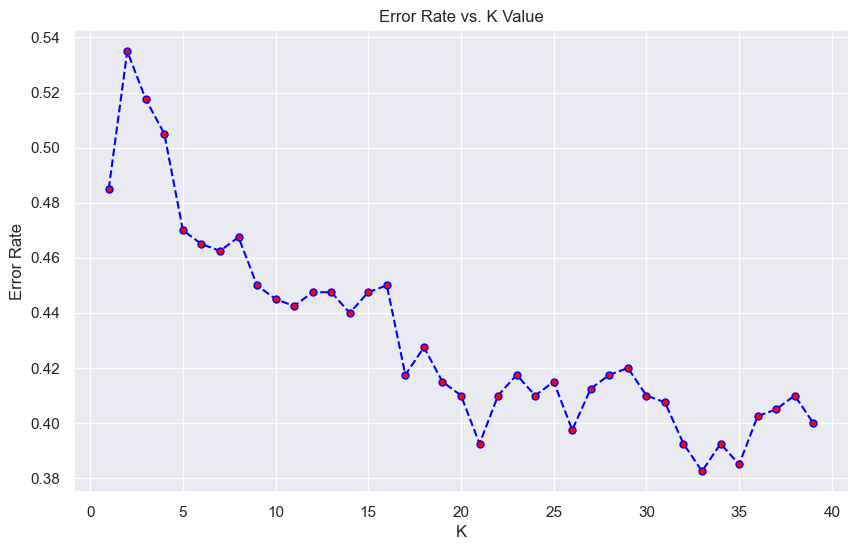

In [57]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
knn1 = KNeighborsClassifier(n_neighbors = 14)
knn1.fit(x_train, y_train)
y_pred_train = knn1.predict(x_train)
y_pred_test = knn1.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[82 19  4  0]
 [30 36 25  0]
 [ 6 30 39 17]
 [ 1  9 35 67]]


classification_report
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       105
           1       0.38      0.40      0.39        91
           2       0.38      0.42      0.40        92
           3       0.80      0.60      0.68       112

    accuracy                           0.56       400
   macro avg       0.56      0.55      0.55       400
weighted avg       0.58      0.56      0.56       400



Training Accuracy 0.67625
********************************************************************************
Test Accuracy 0.56
__________






### 2. Logistic Regression

In [55]:
logistic1 = LogisticRegression(penalty = None)
logistic1.fit(x_train, y_train)
y_pred_train = logistic1.predict(x_train)
y_pred_test = logistic1.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[ 99   6   0   0]
 [  0  91   0   0]
 [  0   1  89   2]
 [  0   0   1 111]]


classification_report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.93      1.00      0.96        91
           2       0.99      0.97      0.98        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400



Training Accuracy 0.99
********************************************************************************
Test Accuracy 0.975
__________






### 3. Support Vector Machine

In [45]:
svc1 = SVC(degree=5,random_state = 111,kernel='linear')
svc1.fit(x_train,y_train)
y_pred_train = svc1.predict(x_train)
y_pred_test = svc1.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[ 98   7   0   0]
 [  0  91   0   0]
 [  0   3  87   2]
 [  0   0   0 112]]


classification_report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.90      1.00      0.95        91
           2       1.00      0.95      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



Training Accuracy 0.9775
********************************************************************************
Test Accuracy 0.97
__________






# Conclusion

Kindly Note: We are checking both train accuracy and Test accuracy inorder to have a check on overfitting problem

Kindly Note: Even without dropping the features we can get 95.5% prediction accuracy using LogisticRegression and 
95% accuracy with Support Vector Machine

